# Preparation

In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for filter warning
import warnings
warnings.simplefilter('ignore')

#Import the library for the linear regression model
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

pd.set_option('display.max_columns', None)
plt.style.use('bmh')
sns.set()

In [2]:
# Import dan read Datasets
url='https://docs.google.com/spreadsheets/d/1e4xkC_rea5p-lRZE5lOUzuOGNaYzFTa99HknHL-2_A4/edit#gid=158370183'
url= url.replace('/edit#gid=', '/export?format=csv&gid=')
employee = pd.read_csv(url)
employee

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78.0,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56.0,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79.0,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,NaN,0


In [3]:
# Menampilkan informasi tiap kolom dari datasaet
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB


In [4]:
# Pertama, mengecek proporsi jumlah missing values yang terdapat pada setiap features.
# Kedua, mengecek jumlah data yang terduplikasi.

print("Missing values proportion:")
print(employee.isnull().sum()/employee.shape[0]) # Untuk menghitung proporsi dari missing values pada setiap features/kolom.
print("="*50)
print("Duplicate data:")
print(employee.duplicated().sum()) # Untuk menghitung jumlah data yang terduplikasi.

Missing values proportion:
employee_id             0.000000
department              0.000000
region                  0.000000
education               0.043953
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    0.075244
length_of_service       0.000000
awards_won              0.000000
avg_training_score      0.046709
is_promoted             0.000000
dtype: float64
Duplicate data:
0


In [5]:
# Pertama, menghilangkan data yang terduplikasi.
# Kedua, mengecek persentasi data yang hilang apabila dilakukan penghilangan missing values. Jika persentasi data yang hilang kurang dari 10 %, maka dapat dilanjutkan dengan tahapan berikutnya.

#df.drop_duplicates(inplace = True) # Untuk menghilangkan data yang terduplikasi.
employee_new = employee.dropna() # Untuk menghilangkan missing values pada data.
loss = 100 - (employee_new.shape[0]/employee.shape[0])*100 # Untuk menghitung persentase jumlah data yang hilang setelah dilakukan penghapusan data terduplikasi dan missing values.

print("Duplicated data:")
print(employee.duplicated().sum())
print("="*50)
print("Data info:")
print(employee.info())
print("="*50)
print("Percentage data loss:")
print(f"{np.round(loss,3)} %")

Duplicated data:
0
Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    52248 non-null  float64
 12  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 5.4+ MB
None
Percentage data loss:
15.377 

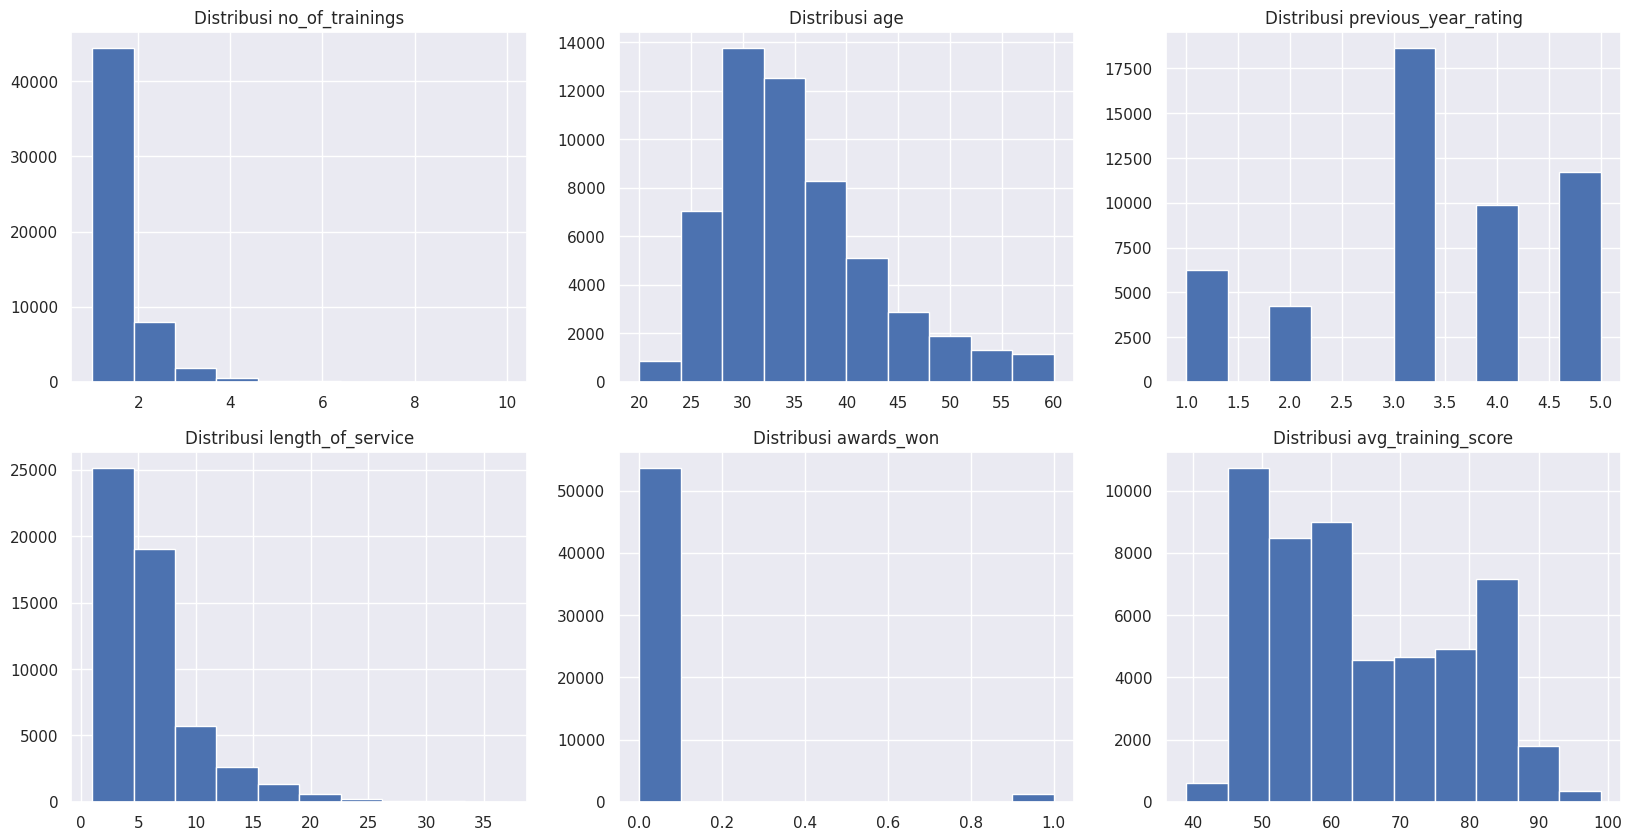

In [6]:
# Melihat distribusi setiap variable
columns_ = ["no_of_trainings", "age", "previous_year_rating", "length_of_service", "awards_won", "avg_training_score"]
index_ = 0
fig, ax = plt.subplots(2,3, figsize = (20,10)) # membuat figur dan axis untuk subplots
for row in range(2):
    for col in range(3):
        ax[row,col].hist(employee[columns_[index_]])
        ax[row,col].set_title(f"Distribusi {columns_[index_]}")
        index_ += 1
plt.show()

In [7]:
# Menginput missing values dengan menggunakan statistik
employee["education"] = employee["education"].fillna(value=employee["education"].mode()[0])
employee["previous_year_rating"] = employee["previous_year_rating"].fillna(value = np.round(employee["previous_year_rating"].median()))
employee["avg_training_score"] = employee["avg_training_score"].fillna(value = np.round(employee["avg_training_score"].median()))


In [8]:
# Mengubah tipe data.
dict_ = { "department" : "category", "region" : "category", "education" : "category",
          "gender" : "category", "recruitment_channel" : "category"}
employee = employee.astype(dict_) # mengubah tipe data dengan ketentuan pada dictionary yang telah dibuat.
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   employee_id           54808 non-null  int64   
 1   department            54808 non-null  category
 2   region                54808 non-null  category
 3   education             54808 non-null  category
 4   gender                54808 non-null  category
 5   recruitment_channel   54808 non-null  category
 6   no_of_trainings       54808 non-null  int64   
 7   age                   54808 non-null  int64   
 8   previous_year_rating  54808 non-null  float64 
 9   length_of_service     54808 non-null  int64   
 10  awards_won            54808 non-null  int64   
 11  avg_training_score    54808 non-null  float64 
 12  is_promoted           54808 non-null  int64   
dtypes: category(5), float64(2), int64(6)
memory usage: 3.6 MB


# EDA

In [9]:
# descriptive statistics
employee_without_id = employee.drop('employee_id', axis=1)
descriptive_non_id = employee_without_id.describe().T
descriptive_non_id

,count,mean,std,min,25%,50%,75%,max
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.0,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.0,33.0,39.0,60.0
previous_year_rating,54808.0,3.304481,1.214770,1.0,3.0,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.0,5.0,7.0,37.0
awards_won,54808.0,0.023172,0.150450,0.0,0.0,0.0,0.0,1.0
avg_training_score,54808.0,63.538845,13.225552,39.0,52.0,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.0,0.0,0.0,1.0


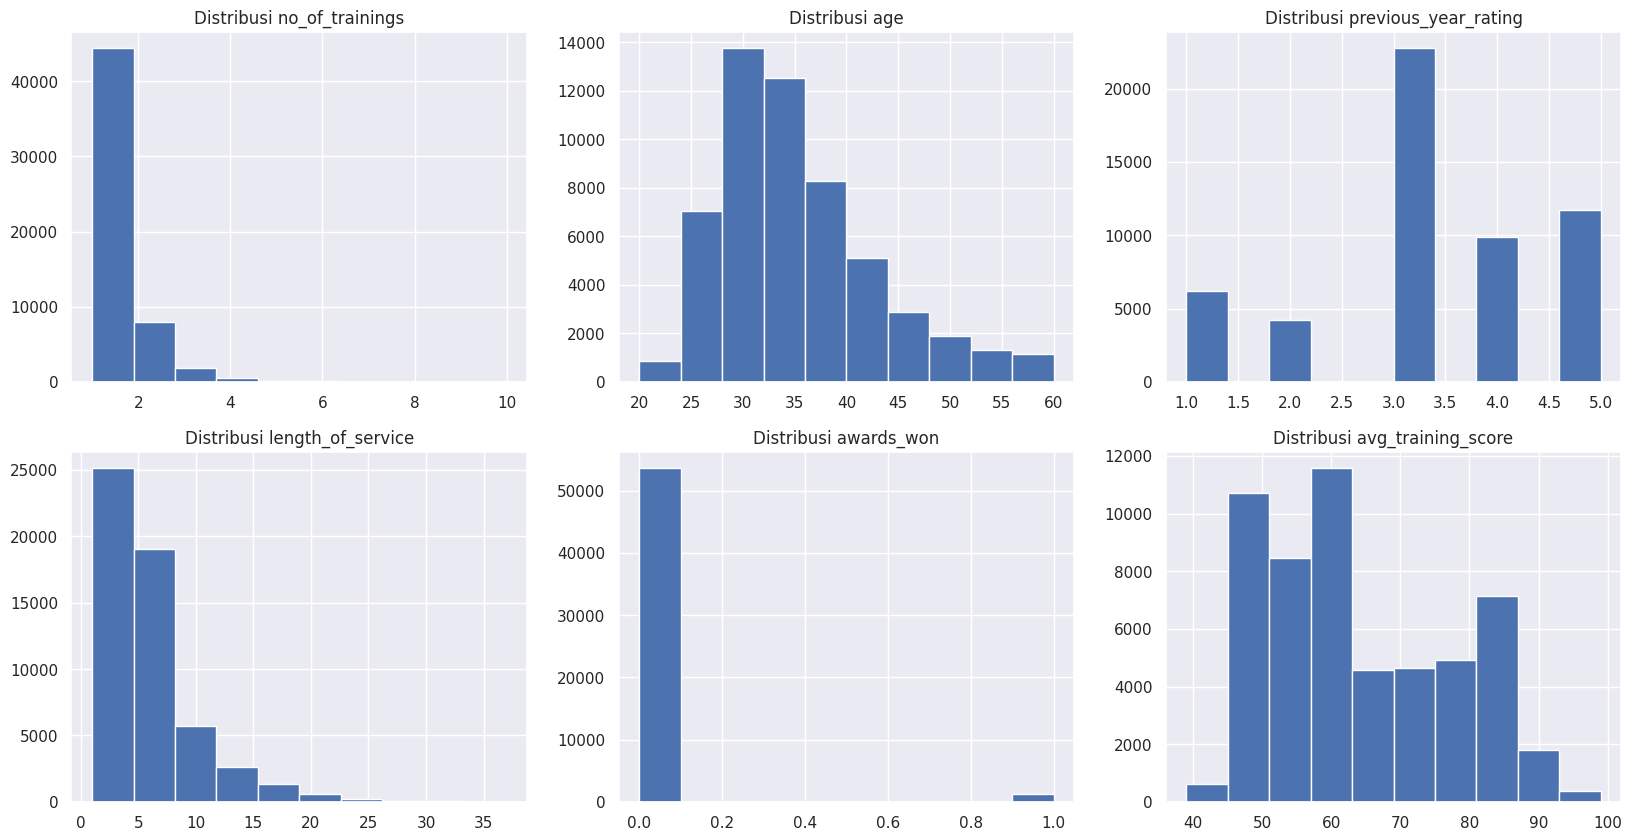

In [10]:
# Melihat distribusi setiap variable
columns_ = ["no_of_trainings", "age", "previous_year_rating", "length_of_service", "awards_won", "avg_training_score"]
index_ = 0
fig, ax = plt.subplots(2,3, figsize = (20,10)) # membuat figur dan axis untuk subplots
for row in range(2):
    for col in range(3):
        ax[row,col].hist(employee[columns_[index_]])
        ax[row,col].set_title(f"Distribusi {columns_[index_]}")
        index_ += 1
plt.show()

In [42]:
employee.groupby("department")[["no_of_trainings", "age", "previous_year_rating", "length_of_service", "length_of_service"]].agg({"median","mean","count"})

no_of_trainings                     age                    \
                           median  count      mean median  count       mean   
department                                                                    
Analytics                     1.0   5352  1.337818   31.0   5352  32.431241   
Finance                       1.0   2536  1.304022   31.0   2536  32.058754   
HR                            1.0   2418  1.053763   32.0   2418  34.385856   
Legal                         1.0   1039  1.089509   32.0   1039  33.832531   
Operations                    1.0  11348  1.160821   35.0  11348  36.073669   
Procurement                   1.0   7138  1.322779   34.0   7138  35.899972   
R&D                           1.0    999  1.402402   32.0    999  32.842843   
Sales & Marketing             1.0  16840  1.277435   33.0  16840  34.860629   
Technology                    1.0   7138  1.260857   33.0   7138  34.867190   

                  previous_year_rating                  length_of_service  \
                                median  count      mean            median   
department                                                                  
Analytics                          3.0   5352  3.508782               4.0   
Finance                            3.0   2536  3.449921               4.0   
HR                                 3.0   2418  3.433830               5.0   
Legal                              3.0   1039  3.339750               4.0   
Operations                         4.0  11348  3.599401               5.0   
Procurement                        3.0   7138  3.280891               5.0   
R&D                                3.0    999  3.514515               4.0   
Sales & Marketing                  3.0  16840  3.062648               5.0   
Technology                         3.0   7138  3.146540               5.0   

                                                            
                   count      mean median  count      mean  
department                                                  
Analytics           5352  4.932735    4.0   5352  4.932735  
Finance             2536  4.819401    4.0   2536  4.819401  
HR                  2418  5.683623    5.0   2418  5.683623  
Legal               1039  4.599615    4.0   1039  4.599615  
Operations         11348  6.416020    5.0  11348  6.416020  
Procurement         7138  6.331045    5.0   7138  6.331045  
R&D                  999  4.554555    4.0    999  4.554555  
Sales & Marketing  16840  5.912292    5.0  16840  5.912292  
Technology          7138  5.914822    5.0   7138  5.914822

In [12]:
employee.groupby(["education","gender"])[["no_of_trainings", "age", "previous_year_rating", "length_of_service", "length_of_service"]].agg({"count","mean"})

no_of_trainings              age             \
                                  count      mean  count       mean   
education        gender                                               
Bachelor's       f                11245  1.175545  11245  33.464206   
                 m                27833  1.301836  27833  33.223224   
Below Secondary  f                  289  1.176471    289  23.598616   
                 m                  516  1.331395    516  23.968992   
Master's & above f                 4778  1.169946   4778  39.289242   
                 m                10147  1.242239  10147  39.382478   

                        previous_year_rating           length_of_service  \
                                       count      mean             count   
education        gender                                                    
Bachelor's       f                     11245  3.324233             11245   
                 m                     27833  3.267704             27833   
Below Secondary  f                       289  3.252595               289   
                 m                       516  3.296512               516   
Master's & above f                      4778  3.414190              4778   
                 m                     10147  3.333695             10147   

                                                    
                             mean  count      mean  
education        gender                             
Bachelor's       f       5.389151  11245  5.389151  
                 m       5.245392  27833  5.245392  
Below Secondary  f       1.678201    289  1.678201  
                 m       1.718992    516  1.718992  
Master's & above f       7.679992   4778  7.679992  
                 m       7.570119  10147  7.570119

[Text(0.5, 1.0, 'Gender vs is_promoted')]

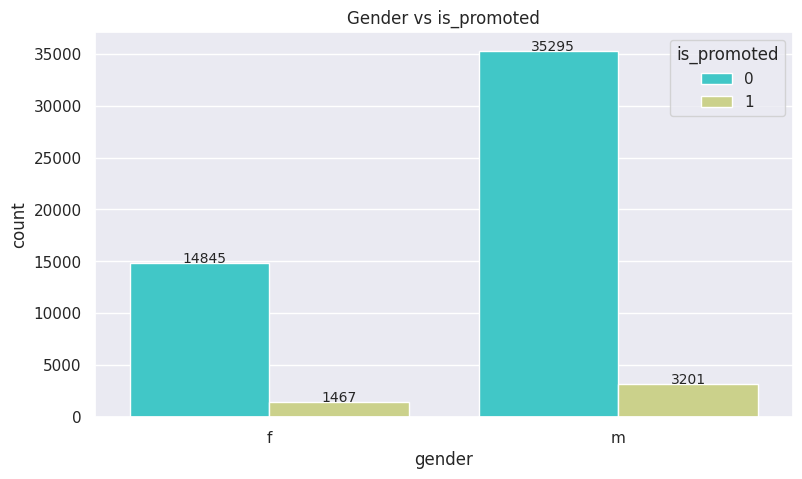

In [14]:
# Function to create barplots that count for each category.
def bar_count(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        count = p.get_height()
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()         # hieght of the plot
        plot.annotate('{:.0f}'.format(count), (x, y), size = 10)  # annotate count value

# gender vs Is_promoted
plt.figure(figsize=(9,5))
ax=sns.countplot(x='gender',hue='is_promoted',data=employee,palette='rainbow')
bar_count(ax,employee['is_promoted'])
ax.set(title="Gender vs is_promoted")


**Apakah pendidikan mempengaruhi seseorang untuk dipromosikan?**

[Text(0.5, 1.0, 'education vs is_promoted')]

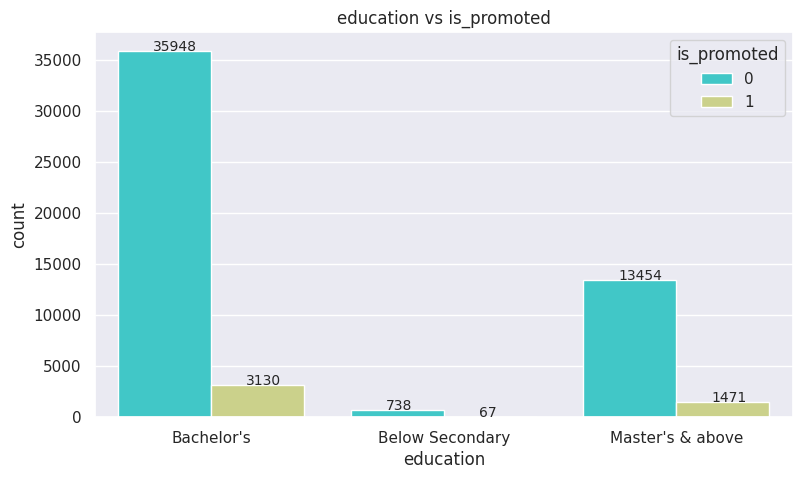

In [15]:
# Function to create barplots that count for each category.
def bar_count(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        count = p.get_height()
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()         # hieght of the plot
        plot.annotate('{:.0f}'.format(count), (x, y), size = 10)  # annotate count value

# education vs Is_promoted
plt.figure(figsize=(9,5))
ax=sns.countplot(x='education',hue='is_promoted',data=employee,palette='rainbow')
bar_count(ax,employee['is_promoted'])
ax.set(title="education vs is_promoted")

**Apakah terdapat perbedaan dalam tingkat promosi antara karyawan dengan penghargaan yang diterima dan yang tidak menerima penghargaan?**

[Text(0.5, 1.0, 'awards_won vs is_promoted')]

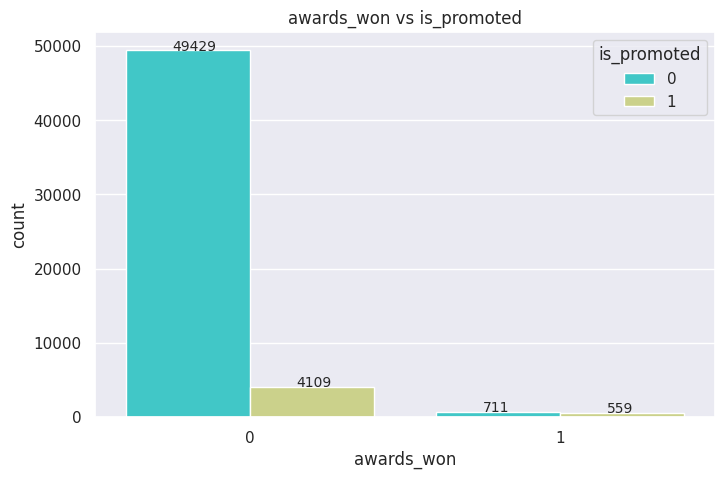

In [17]:
# Function to create barplots that count for each category.
def bar_count(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        count = p.get_height()
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()         # hieght of the plot
        plot.annotate('{:.0f}'.format(count), (x, y), size = 10)  # annotate count value

# awards_won vs Is_promoted
plt.figure(figsize=(8,5))
ax=sns.countplot(x='awards_won',hue='is_promoted',data=employee,palette='rainbow')
bar_count(ax,employee['is_promoted'])
ax.set(title="awards_won vs is_promoted")

**Bagaimana distribusi rekomendasi promosi di berbagai departemen?**

[Text(0.5, 1.0, 'department vs is_promoted')]

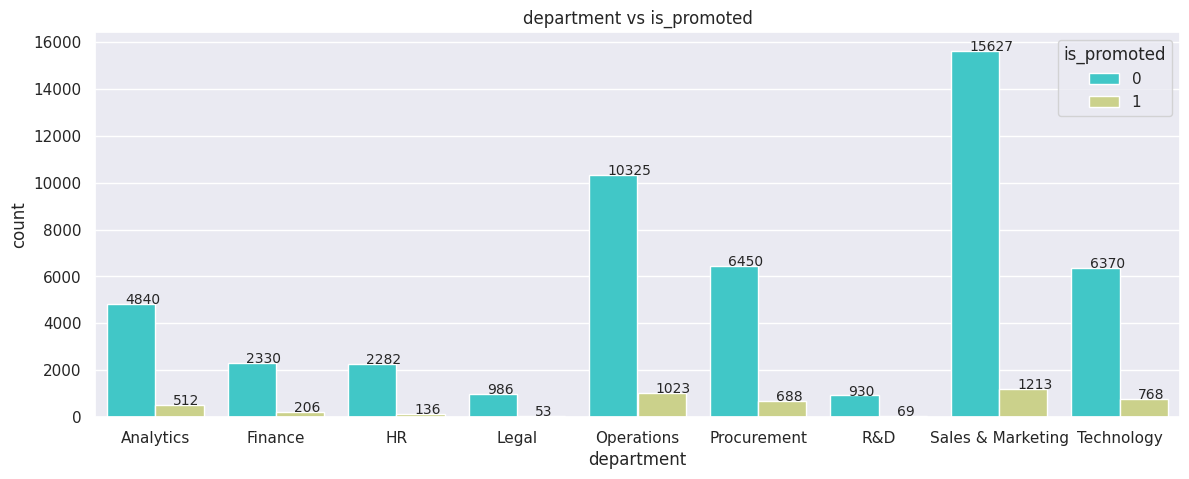

In [19]:
# Function to create barplots that count for each category.
def bar_count(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        count = p.get_height()
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()         # hieght of the plot
        plot.annotate('{:.0f}'.format(count), (x, y), size = 10)  # annotate count value

# Department vs Is_promoted
plt.figure(figsize=(14,5))
ax=sns.countplot(x='department',hue='is_promoted',data=employee,palette='rainbow')
bar_count(ax,employee['department'])
ax.set(title="department vs is_promoted")

In [20]:
employee.groupby(["department","is_promoted"])[["is_promoted"]].agg({"count"})

is_promoted
                                    count
department        is_promoted            
Analytics         0                  4840
                  1                   512
Finance           0                  2330
                  1                   206
HR                0                  2282
                  1                   136
Legal             0                   986
                  1                    53
Operations        0                 10325
                  1                  1023
Procurement       0                  6450
                  1                   688
R&D               0                   930
                  1                    69
Sales & Marketing 0                 15627
                  1                  1213
Technology        0                  6370
                  1                   768

**Apakah terdapat perbedaan dalam tingkat promosi antara karyawan yang direkrut melalui kanal rekrutmen yang berbeda?**

[Text(0.5, 1.0, 'recruitment_channel vs is_promoted')]

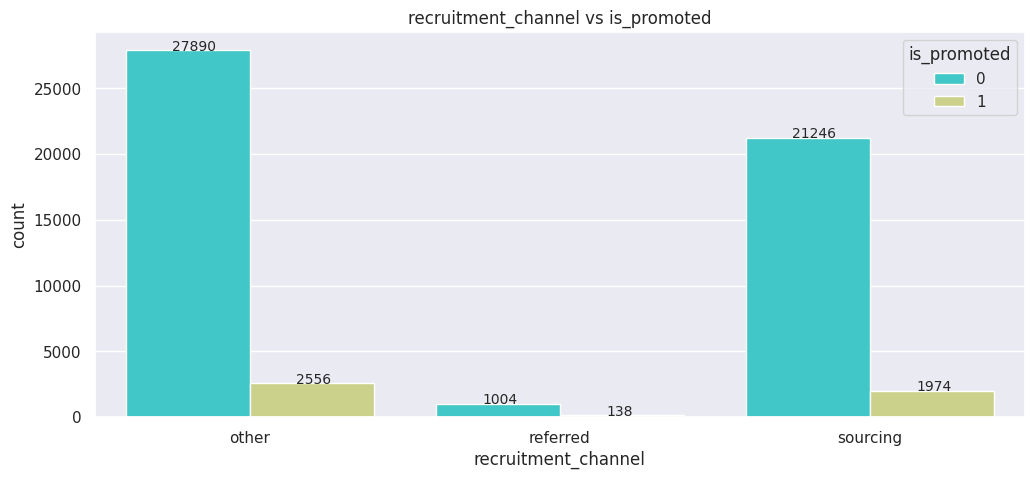

In [21]:

# Function to create barplots that count for each category.
def bar_count(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        count = p.get_height()
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()         # hieght of the plot
        plot.annotate('{:.0f}'.format(count), (x, y), size = 10)  # annotate count value

# recruitment_channel vs Is_promoted
plt.figure(figsize=(12,5))
ax=sns.countplot(x='recruitment_channel',hue='is_promoted',data=employee,palette='rainbow')
bar_count(ax,employee['is_promoted'])
ax.set(title="recruitment_channel vs is_promoted")

In [22]:
employee.groupby(["recruitment_channel","is_promoted"])[["is_promoted"]].agg({"count"})

is_promoted
                                      count
recruitment_channel is_promoted            
other               0                 27890
                    1                  2556
referred            0                  1004
                    1                   138
sourcing            0                 21246
                    1                  1974

**Apakah karyawan yang memiliki penilaian tahun sebelumnya yang tinggi cenderung mendapatkan promosi?**

[Text(0.5, 1.0, 'previous_year_rating vs is_promoted')]

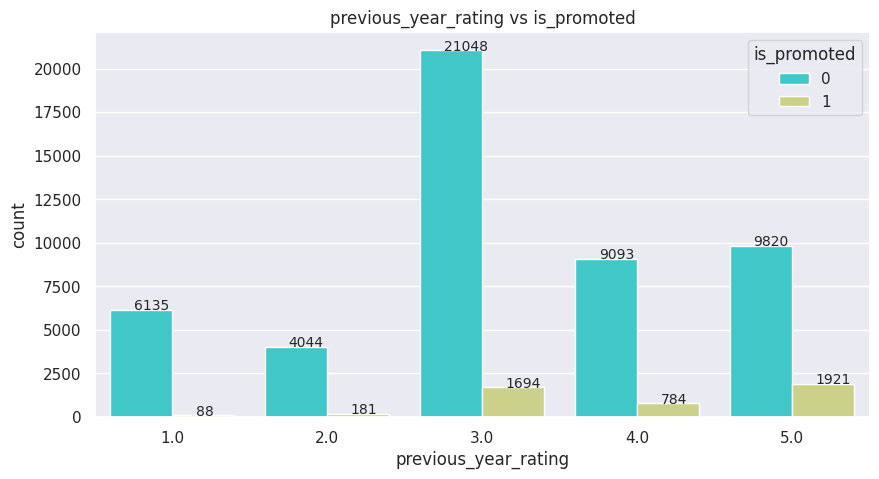

In [23]:
# Function to create barplots that count for each category.
def bar_count(plot, feature):
    total = len(feature) # length of the column
    for p in plot.patches:
        count = p.get_height()
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()         # hieght of the plot
        plot.annotate('{:.0f}'.format(count), (x, y), size = 10)  # annotate count value

# previous_year_rating vs Is_promoted
plt.figure(figsize=(10,5))
ax=sns.countplot(x='previous_year_rating',hue='is_promoted',data=employee,palette='rainbow')
bar_count(ax,employee['is_promoted'])
ax.set(title="previous_year_rating vs is_promoted")

**Bagimana skor rata-rata pelatihan karyawan berhubungan dengan rekomendasi promosi mereka?**

In [24]:
employee.groupby(["is_promoted"])[["avg_training_score"]].agg({"mean"})

,avg_training_score
,mean
is_promoted,
0,62.807579
1,71.393530


In [25]:
employee.groupby(["recruitment_channel"])[["is_promoted"]].agg({"sum"})

,is_promoted
,sum
recruitment_channel,
other,2556
referred,138
sourcing,1974


# Statistic test

In [26]:
from scipy.stats import ttest_ind

# Mengambil data usia karyawan yang direkomendasikan untuk promosi
age_promoted = employee[employee['is_promoted'] == 1]['age']

# Mengambil data usia karyawan yang tidak direkomendasikan untuk promosi
age_not_promoted = employee[employee['is_promoted'] == 0]['age']

# Melakukan uji t-test untuk perbedaan rata-rata usia antara kedua kelompok
stat, p_value = ttest_ind(age_promoted, age_not_promoted, equal_var=False)

# Menampilkan hasil uji t-test
print("Hasil Uji t-test untuk Perbedaan Rata-rata Usia:")
print(f"Statistic: {stat:.4f}")
print(f"P-value: {p_value:.4f}")
print("=" * 50)

# Kesimpulan berdasarkan p-value dan alpha
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
    print("Ada perbedaan rata-rata usia antara karyawan yang direkomendasikan untuk promosi dan yang tidak direkomendasikan.")
else:
    print("Failed to reject the null hypothesis")
    print("Tidak ada perbedaan rata-rata usia antara karyawan yang direkomendasikan untuk promosi dan yang tidak direkomendasikan.")


Hasil Uji t-test untuk Perbedaan Rata-rata Usia:
Statistic: -4.3132
P-value: 0.0000
Reject the null hypothesis
Ada perbedaan rata-rata usia antara karyawan yang direkomendasikan untuk promosi dan yang tidak direkomendasikan.


Berdasarkan hasil uji t-test didapatkan bahwa, menolak hipotesis nol (H0) yang menyatakan bahwa tidak ada perbedaan rata-rata usia antara kedua kelompok tersebut, dan menyimpulkan bahwa ada perbedaan yang signifikan dalam rata-rata usia antara karyawan yang direkomendasikan untuk promosi dan karyawan yang tidak direkomendasikan untuk promosi.

In [27]:
from scipy.stats import chi2_contingency

# Departemen
observed_dept = pd.crosstab(employee['is_promoted'], employee['department'])

# Melakukan uji Chi-square untuk departemen
stat_dept, p_value_dept, _, _ = chi2_contingency(observed_dept)

# Menampilkan hasil uji proporsi untuk departemen
print("Hasil Uji Proporsi untuk Departemen:")
print(f"Statistic: {stat_dept:.4f}")
print(f"P-value: {p_value_dept:.4f}")
print("=" * 50)

# Kesimpulan berdasarkan p-value dan alpha untuk departemen
alpha = 0.05
if p_value_dept < alpha:
    print("Reject the null hypothesis for Departemen")
else:
    print("Failed to reject the null hypothesis for Departemen")
print("=" * 50)

# Wilayah
observed_region = pd.crosstab(employee['is_promoted'], employee['region'])

# Melakukan uji Chi-square untuk wilayah
stat_region, p_value_region, _, _ = chi2_contingency(observed_region)

# Menampilkan hasil uji proporsi untuk wilayah
print("Hasil Uji Proporsi untuk Wilayah:")
print(f"Statistic: {stat_region:.4f}")
print(f"P-value: {p_value_region:.4f}")
print("=" * 50)

# Kesimpulan berdasarkan p-value dan alpha untuk wilayah
if p_value_region < alpha:
    print("Reject the null hypothesis for Wilayah")
else:
    print("Failed to reject the null hypothesis for Wilayah")
print("=" * 50)

Hasil Uji Proporsi untuk Departemen:
Statistic: 151.4264
P-value: 0.0000
Reject the null hypothesis for Departemen
Hasil Uji Proporsi untuk Wilayah:
Statistic: 475.6402
P-value: 0.0000
Reject the null hypothesis for Wilayah


In [28]:
# Pendidikan
observed_education = pd.crosstab(employee['is_promoted'], employee['education'])

# Melakukan uji Chi-square untuk pendidikan
stat_education, p_value_education, _, _ = chi2_contingency(observed_education)

# Menampilkan hasil uji proporsi untuk pendidikan
print("Hasil Uji Proporsi untuk Pendidikan:")
print(f"Statistic: {stat_education:.4f}")
print(f"P-value: {p_value_education:.4f}")
print("=" * 50)

# Kesimpulan berdasarkan p-value dan alpha untuk pendidikan
if p_value_education < alpha:
    print("Reject the null hypothesis for Pendidikan")
else:
    print("Failed to reject the null hypothesis for Pendidikan")
print("=" * 50)

# Jenis Kelamin
observed_gender = pd.crosstab(employee['is_promoted'], employee['gender'])

# Melakukan uji Chi-square untuk jenis kelamin
stat_gender, p_value_gender, _, _ = chi2_contingency(observed_gender)

# Menampilkan hasil uji proporsi untuk jenis kelamin
print("Hasil Uji Proporsi untuk Jenis Kelamin:")
print(f"Statistic: {stat_gender:.4f}")
print(f"P-value: {p_value_gender:.4f}")
print("=" * 50)

# Kesimpulan berdasarkan p-value dan alpha untuk jenis kelamin
if p_value_gender < alpha:
    print("Reject the null hypothesis for Jenis Kelamin")
else:
    print("Failed to reject the null hypothesis for Jenis Kelamin")
print("=" * 50)

Hasil Uji Proporsi untuk Pendidikan:
Statistic: 47.2912
P-value: 0.0000
Reject the null hypothesis for Pendidikan
Hasil Uji Proporsi untuk Jenis Kelamin:
Statistic: 6.6773
P-value: 0.0098
Reject the null hypothesis for Jenis Kelamin


In [29]:
# Kanal Rekrutmen
observed_recr_channel = pd.crosstab(employee['is_promoted'], employee['recruitment_channel'])

# Melakukan uji Chi-square untuk kanal rekrutmen
stat_recr_channel, p_value_recr_channel, _, _ = chi2_contingency(observed_recr_channel)

# Menampilkan hasil uji proporsi untuk kanal rekrutmen
print("Hasil Uji Proporsi untuk Kanal Rekrutmen:")
print(f"Statistic: {stat_recr_channel:.4f}")
print(f"P-value: {p_value_recr_channel:.4f}")
print("=" * 50)

# Kesimpulan berdasarkan p-value dan alpha untuk kanal rekrutmen
if p_value_recr_channel < alpha:
    print("Reject the null hypothesis for Kanal Rekrutmen")
else:
    print("Failed to reject the null hypothesis for Kanal Rekrutmen")
print("=" * 50)

Hasil Uji Proporsi untuk Kanal Rekrutmen:
Statistic: 19.2363
P-value: 0.0001
Reject the null hypothesis for Kanal Rekrutmen


Secara keseluruhan, berdasarkan hasil uji proporsi didaptkan menolak hipotesis nol (H0). Dengan demikian, ada indikasi bahwa faktor-faktor seperti departemen, wilayah, pendidikan, jenis kelamin, dan kanal rekrutmen memiliki pengaruh terhadap proporsi karyawan yang direkomendasikan untuk promosi. Perbedaan proporsi ini bisa menjadi perhatian dalam pengambilan keputusan terkait promosi karyawan.

In [30]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

print("H0: Tidak ada perbedaan rata-rata skor pelatihan antara kelompok karyawan yang direkomendasikan untuk promosi dan yang tidak direkomendasikan.")
print("H1: Ada perbedaan rata-rata skor pelatihan antara kedua kelompok.")
print("\n")

# Membuat persamaan linear antara skor pelatihan dengan variabel 'is_promoted'
model_training_score = ols('avg_training_score ~ is_promoted', data=employee).fit()

# Melakukan uji ANOVA
anova_table = sm.stats.anova_lm(model_training_score)

# Menampilkan hasil uji
print("Hasil Uji ANOVA:")
print(anova_table)
print("=" * 50)

# Kesimpulan berdasarkan p-value dan alpha
alpha = 0.05
p_value = anova_table['PR(>F)'][0]  # Mengambil p-value dari kolom 'PR(>F)' pada baris pertama

if p_value < alpha:
    print("Reject the null hypothesis")
    print("Ada perbedaan rata-rata skor pelatihan antara kedua kelompok.")
else:
    print("Failed to reject the null hypothesis")
    print("Tidak ada perbedaan rata-rata skor pelatihan antara kedua kelompok.")


H0: Tidak ada perbedaan rata-rata skor pelatihan antara kelompok karyawan yang direkomendasikan untuk promosi dan yang tidak direkomendasikan.
H1: Ada perbedaan rata-rata skor pelatihan antara kedua kelompok.


Hasil Uji ANOVA:
                  df        sum_sq        mean_sq            F  PR(>F)
is_promoted      1.0  3.148097e+05  314809.694964  1860.859456     0.0
Residual     54806.0  9.271770e+06     169.174353          NaN     NaN
Reject the null hypothesis
Ada perbedaan rata-rata skor pelatihan antara kedua kelompok.


Berdasarkan hasil uji ANOVA, didaptkan menolak hipotesis nol (H0) dan menyimpulkan bahwa ada perbedaan rata-rata skor pelatihan antara karyawan yang direkomendasikan untuk promosi dan yang tidak direkomendasikan. Dengan demikian, faktor rekomendasi promosi dapat mempengaruhi rata-rata skor pelatihan karyawan. Hal ini dapat menjadi pertimbangan dalam pengambilan keputusan terkait promosi dan pengembangan karyawan.

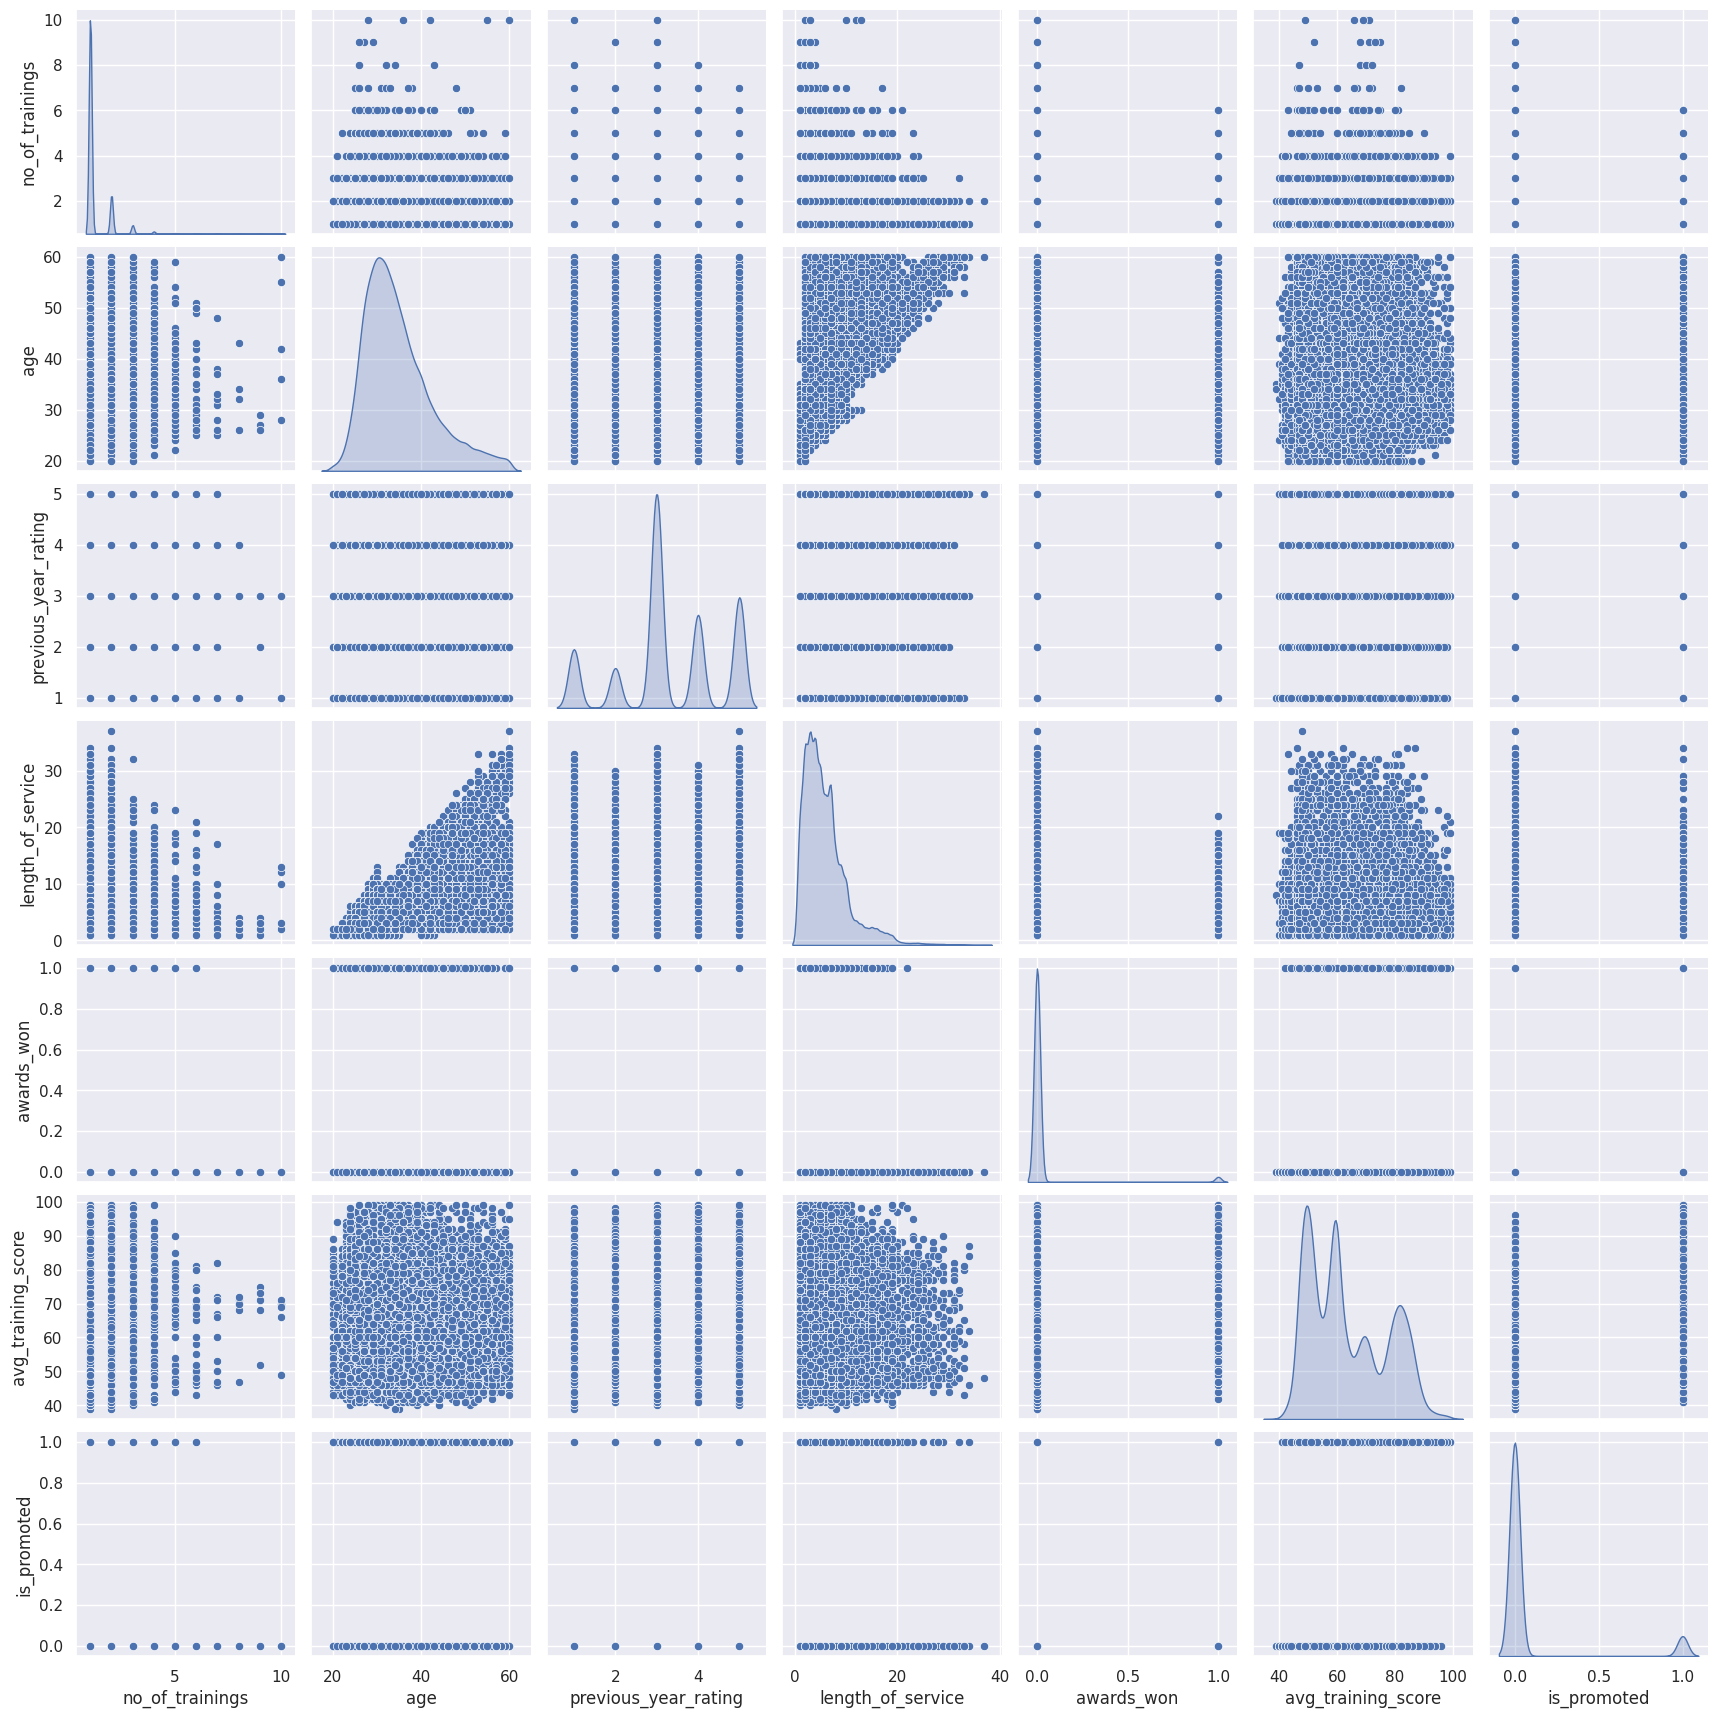

In [31]:
# Kode di bawah bertujuan untuk memvisualisasikan interaksi antara bebera features dengan meggunakan scatter plot dan kde plot.
columns_ = ["no_of_trainings", "age", "previous_year_rating", "length_of_service", "awards_won", "avg_training_score","is_promoted"]
sns.pairplot(employee[columns_], diag_kind = 'kde')
plt.show()

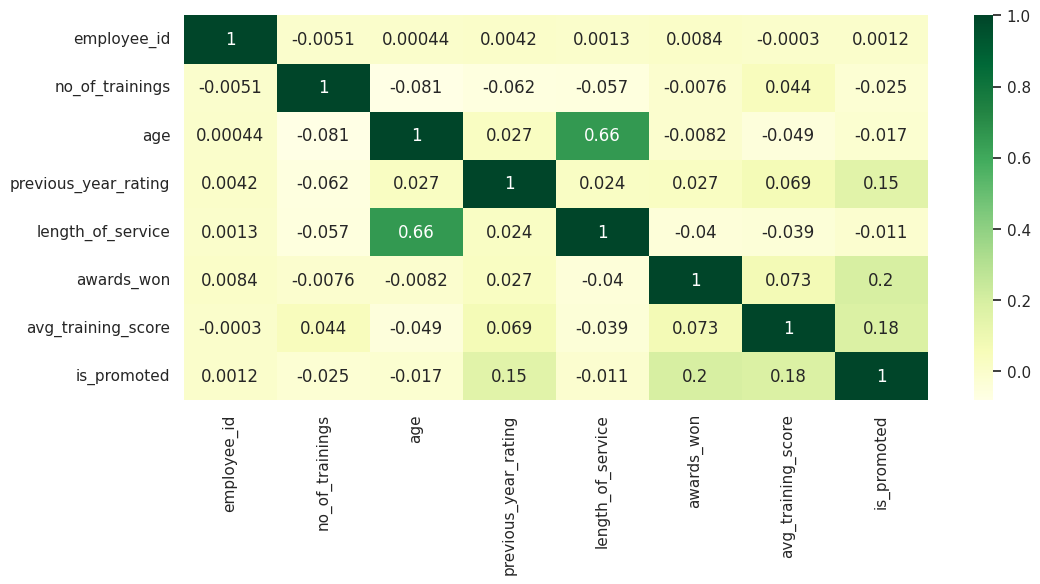

In [32]:
#Corelation Variable
plt.figure(figsize=(12,5))
sns.heatmap(employee.corr(numeric_only=True),annot=True ,cmap="YlGn" )
plt.show()

# Building Regression Model
Berdasarkan hasil pengujian statistik sebelumnya, kita mengetahui bahwa terdapat beberapa variabel yang signifikan memengaruhi pengambilan keputusan terkait promosi karyawan. Variabel-variabel inilah yang akan kita utamakan dalam membangun model regresi. Untuk variabel-variabel yang tidak signifikan tidak akan dilibatkan.

In [33]:
employee.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [34]:
data=employee.copy()

In [35]:
# Exclude variabel-variabel yang tidak memberikan efek signifikan
data.drop(['employee_id','region','age', 'no_of_trainings', 'length_of_service'], axis=1, inplace = True)
data

,department,education,gender,recruitment_channel,previous_year_rating,awards_won,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,f,sourcing,5.0,0,49.0,0
1,Operations,Bachelor's,m,other,5.0,0,60.0,0
2,Sales & Marketing,Bachelor's,m,sourcing,3.0,0,50.0,0
3,Sales & Marketing,Bachelor's,m,other,1.0,0,50.0,0
4,Technology,Bachelor's,m,other,3.0,0,73.0,0
...,...,...,...,...,...,...,...,...
54803,Technology,Bachelor's,m,sourcing,3.0,0,78.0,0
54804,Operations,Master's & above,f,other,2.0,0,56.0,0
54805,Analytics,Bachelor's,m,other,5.0,0,79.0,0
54806,Sales & Marketing,Bachelor's,m,sourcing,1.0,0,60.0,0


In [36]:
#Import the module for the linear regression model
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats

#Construct the model
lm = smf.ols('is_promoted ~ department + education	+ gender	+ recruitment_channel	+ previous_year_rating	+ awards_won	+ avg_training_score', data = data).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            is_promoted   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     836.3
Date:                Sat, 15 Jul 2023   Prob (F-statistic):               0.00
Time:                        02:50:38   Log-Likelihood:                -1842.8
No. Observations:               54808   AIC:                             3720.
Df Residuals:                   54791   BIC:                             3871.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [37]:
#Remove variabel is_menikah karena gak signifikan secara statistik
data.drop(['gender','recruitment_channel'], axis = 1, inplace = True)

#Alternative way using one hot encoding
encoded_df = pd.get_dummies(data = data, columns = ['department', 'education'])
encoded_df

,previous_year_rating,awards_won,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,education_Bachelor's,education_Below Secondary,education_Master's & above
0,5.0,0,49.0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,5.0,0,60.0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,3.0,0,50.0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1.0,0,50.0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,3.0,0,73.0,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3.0,0,78.0,0,0,0,0,0,0,0,0,0,1,1,0,0
54804,2.0,0,56.0,0,0,0,0,0,1,0,0,0,0,0,0,1
54805,5.0,0,79.0,0,1,0,0,0,0,0,0,0,0,1,0,0
54806,1.0,0,60.0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [38]:
encoded_df.rename(columns={'department_R&D' : 'department_RD',
                          'department_Sales & Marketing': 'department_Sales',
                           'department_Technology': 'department_Tech',
                           'education_Bachelor\'s': 'education_Bachelor',
                           'education_Below Secondary' : 'education_Below_S',
                           'education_Master\'s & above': 'education_Master',
                           'recruitment_channel_other': 'recruitment_c_other',
                           'recruitment_channel_referred': 'recruitment_c_referred',
                           'recruitment_channel_sourcing': 'recruitment_c_sourcing'}, inplace=True)

In [39]:
encoded_df

,previous_year_rating,awards_won,avg_training_score,is_promoted,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_RD,department_Sales,department_Tech,education_Bachelor,education_Below_S,education_Master
0,5.0,0,49.0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,5.0,0,60.0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,3.0,0,50.0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1.0,0,50.0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,3.0,0,73.0,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3.0,0,78.0,0,0,0,0,0,0,0,0,0,1,1,0,0
54804,2.0,0,56.0,0,0,0,0,0,1,0,0,0,0,0,0,1
54805,5.0,0,79.0,0,1,0,0,0,0,0,0,0,0,1,0,0
54806,1.0,0,60.0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [40]:
#Construct the model
lm1 = smf.ols('is_promoted ~ previous_year_rating	+ awards_won	+ avg_training_score +	department_Analytics +	department_Finance +	department_HR +	department_Legal +	department_Operations +	department_Procurement +	department_RD +	department_Sales +	department_Tech +	education_Bachelor +	education_Below_S +	education_Master' ,
              data = encoded_df).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:            is_promoted   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     1029.
Date:                Sat, 15 Jul 2023   Prob (F-statistic):               0.00
Time:                        02:50:39   Log-Likelihood:                -1844.0
No. Observations:               54808   AIC:                             3716.
Df Residuals:                   54794   BIC:                             3841.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -1

**Kesimpulan**
- revious_year_rating: Koefisien positif menunjukkan bahwa karyawan dengan peringkat tahun sebelumnya yang tinggi cenderung lebih mungkin dipromosikan.
- awards_won: Koefisien positif menunjukkan bahwa karyawan yang memenangkan penghargaan memiliki peluang lebih tinggi untuk dipromosikan.
- avg_training_score: Koefisien positif menunjukkan bahwa karyawan dengan skor pelatihan yang tinggi memiliki peluang lebih tinggi untuk dipromosikan.
- department_HR, department_Operations, department_Sales: Koefisien positif menunjukkan bahwa karyawan di departemen HR, Operasi, dan Penjualan memiliki peluang lebih tinggi untuk dipromosikan.
- department_Analytics, department_Procurement, department_Tech: Koefisien negatif menunjukkan bahwa karyawan di departemen Analitik, Pengadaan, dan Teknologi memiliki peluang lebih rendah untuk dipromosikan.
- education_Bachelor, education_Master: Koefisien positif menunjukkan bahwa karyawan dengan gelar sarjana dan gelar master memiliki peluang lebih tinggi untuk dipromosikan.
- Variabel prediktor "department_Legal" dan "education_Below_S" memiliki p-value yang lebih besar dari 0.05, yang berarti variabel tersebut tidak memiliki pengaruh signifikan terhadap peluang promosi.

Dalam kesimpulannya, model ini memberikan gambaran awal tentang hubungan antara variabel prediktor dengan variabel target "is_promoted".




